<a href="https://colab.research.google.com/github/tejasreejilla/data-analyst/blob/main/data_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries


In [ ]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for handling datetime
from datetime import datetime

# Library for clustering and segmentation
from sklearn.cluster import KMeans


loading the data

In [ ]:
# Load the dataset
file_path = "/content/Amazon Sale Report.csv"  # Replace with the correct path
data = pd.read_csv(file_path)

inspect the dataset

In [ ]:
# Inspect the dataset
print(data.info())  # Check for data types and missing values
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

handling the data and new features

In [ ]:
# Print column names
print("Column names in the dataset:")
print(data.columns)
print(data.columns.tolist())

Column names in the dataset:
Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')
['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS']


In [ ]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Create new features
data['Month-Year'] = data['Date'].dt.to_period('M')  # For trend analysis

<ipython-input-8-d2759354894d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


sales analysis


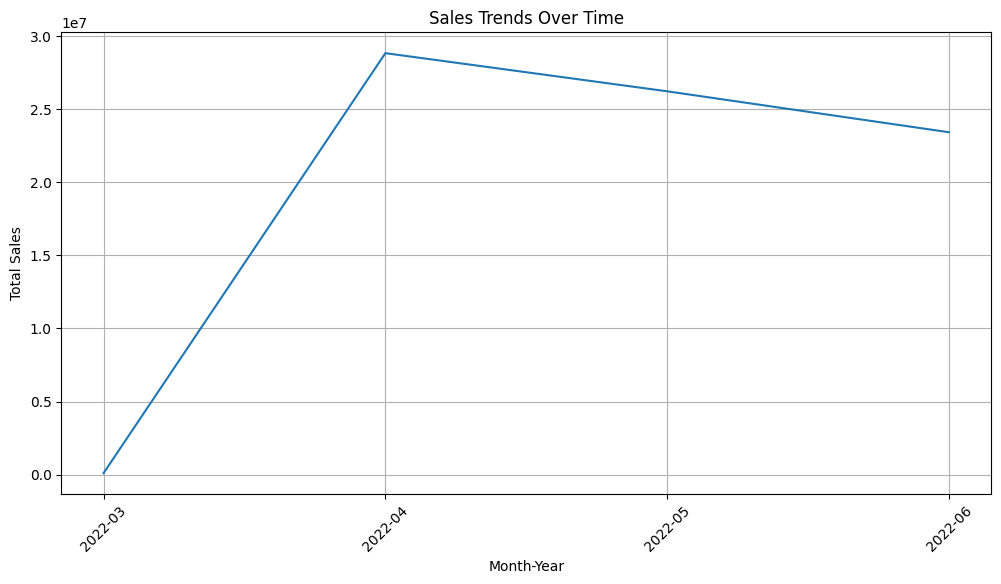

Total Revenue: $78,590,170.25
Average Order Value (AOV): $648.56


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Amount' to numeric, replacing invalid entries with NaN
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Drop rows with NaN in 'Amount' column
data = data.dropna(subset=['Amount'])

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with NaT in 'Date' column
data = data.dropna(subset=['Date'])

# Create a Month-Year column for trend analysis
data['Month-Year'] = data['Date'].dt.to_period('M').astype(str)

# Calculate total sales per month
sales_trends = data.groupby('Month-Year', as_index=False)['Amount'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x='Month-Year', y='Amount')
plt.title("Sales Trends Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Calculate Total Revenue and Average Order Value (AOV)
total_revenue = data['Amount'].sum()
average_order_value = data['Amount'].mean()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value (AOV): ${average_order_value:,.2f}")


product performance anaysis

<ipython-input-10-9c001fbe0b0f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Category', y='Qty', palette='viridis')


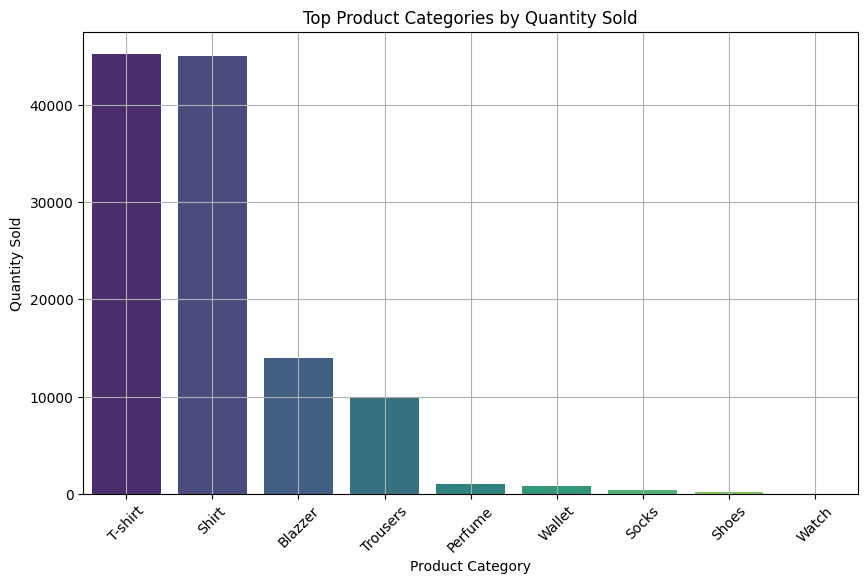

In [ ]:
# Top-performing product categories
product_performance = data.groupby('Category')['Qty'].sum().reset_index()
top_products = product_performance.sort_values(by='Qty', ascending=False)

# Plot top product categories
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Category', y='Qty', palette='viridis')
plt.title("Top Product Categories by Quantity Sold")
plt.xlabel("Product Category")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.grid()
plt.show()


method analysis

<ipython-input-11-a47a5178b808>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fulfillment_stats, x='Fulfilment', y='Order ID', palette='coolwarm')


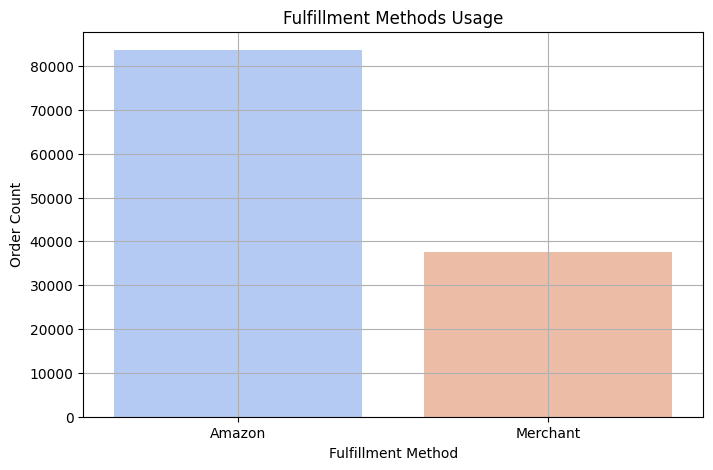

In [ ]:
# Analyze fulfillment methods
fulfillment_stats = data.groupby('Fulfilment')['Order ID'].count().reset_index()

# Plot fulfillment methods usage
plt.figure(figsize=(8, 5))
sns.barplot(data=fulfillment_stats, x='Fulfilment', y='Order ID', palette='coolwarm')
plt.title("Fulfillment Methods Usage")
plt.xlabel("Fulfillment Method")
plt.ylabel("Order Count")
plt.grid()
plt.show()

geographical analysis

<ipython-input-12-65873e0a500b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x='ship-state', y='Amount', palette='cubehelix')


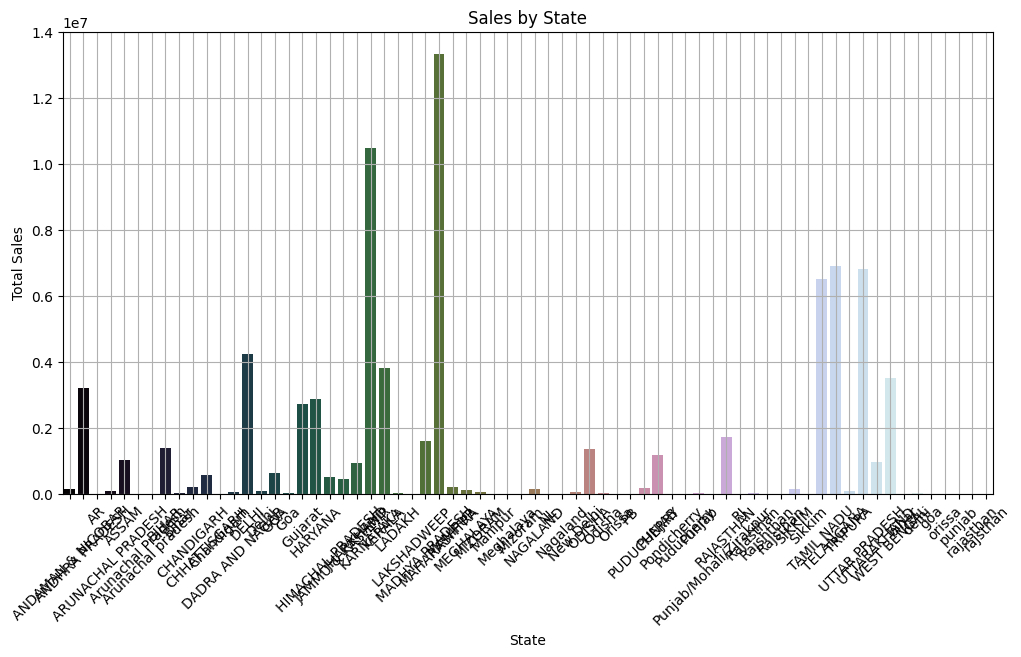

In [ ]:
# Regional sales analysis
regional_sales = data.groupby(['ship-state', 'ship-city'])['Amount'].sum().reset_index()

# Plot sales by state
plt.figure(figsize=(12, 6))
state_sales = regional_sales.groupby('ship-state')['Amount'].sum().reset_index()
sns.barplot(data=state_sales, x='ship-state', y='Amount', palette='cubehelix')
plt.title("Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()
plt.show()

customer segmentation

<ipython-input-13-fcd421d4a702>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=b2b_sales, x='B2B', y='Amount', palette='Set2')


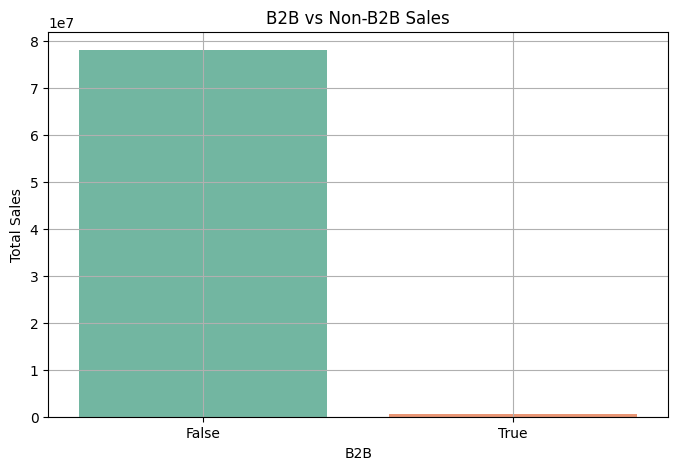

In [ ]:
# Segment B2B vs non-B2B sales
b2b_sales = data.groupby('B2B')['Amount'].sum().reset_index()

# Plot B2B vs non-B2B sales
plt.figure(figsize=(8, 5))
sns.barplot(data=b2b_sales, x='B2B', y='Amount', palette='Set2')
plt.title("B2B vs Non-B2B Sales")
plt.xlabel("B2B")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


business insights

In [ ]:
# Calculate Key Metrics
total_revenue = data['Amount'].sum()
average_order_value = data['Amount'].mean()
high_value_customers = data.groupby('Order ID')['Amount'].sum().sort_values(ascending=False).head(10)
top_states = data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(5)
top_categories = data.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)

# Print Key Insights
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${average_order_value:,.2f}")
print("Top 5 States by Revenue:")
print(top_states)
print("\nTop 5 Product Categories by Revenue:")
print(top_categories)
print("\nTop 10 High-Value Customers:")
print(high_value_customers)


Total Revenue: $78,590,170.25
Average Order Value: $648.56
Top 5 States by Revenue:
ship-state
MAHARASHTRA      13340333.05
KARNATAKA        10480694.22
TELANGANA         6915018.08
UTTAR PRADESH     6823947.08
TAMIL NADU        6519182.30
Name: Amount, dtype: float64

Top 5 Product Categories by Revenue:
Category
T-shirt     39206756.65
Shirt       21297770.08
Blazzer     11215104.12
Trousers     5346286.30
Perfume       789419.66
Name: Amount, dtype: float64

Top 10 High-Value Customers:
Order ID
408-3363121-6123562    8636.0
405-8750647-4224357    8081.0
403-4288285-8521928    6993.0
404-9932919-6662730    6832.0
408-3317403-1729937    6680.0
408-4410167-4971567    6536.0
405-4755854-9568304    6535.0
406-9002076-4152331    6509.0
171-0706521-2133101    6313.0
402-5239558-4281957    6282.0
Name: Amount, dtype: float64


visualization insights

<ipython-input-18-ca58f526a419>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


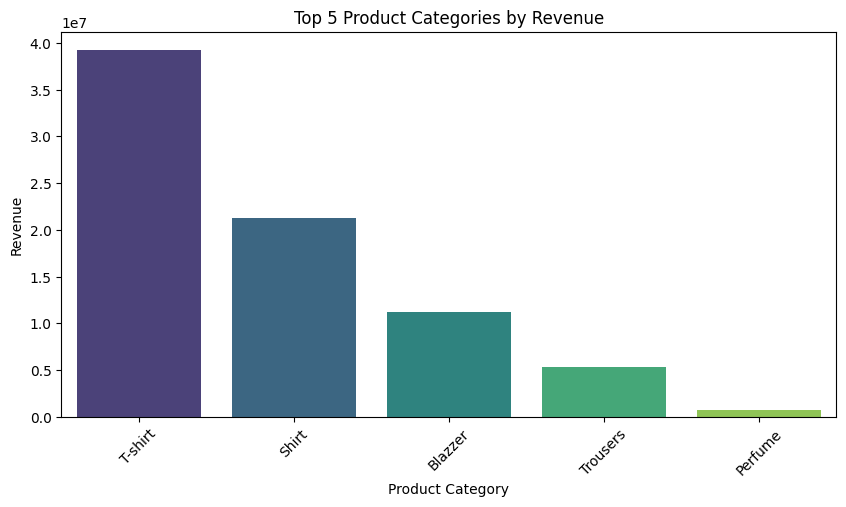

In [ ]:
# Plot Top Categories
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title("Top 5 Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()
